# L1 : Q5

![](../questoes/q5.png "")

### Fix the notebook path for this project

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

### Imports

In [2]:
import numpy as np
from neuralnetworks.neuralnetwork import NeuralNetwork
###from datasets.l1q4 import createDataSetL1Q4
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error

### Set a random seed

In [3]:
SEED = 42
np.random.seed(seed=SEED)

### Create the dataset

In [4]:
X, y = createDataSetL1Q4(5000)

### Split into train and test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### Lets check some training set rows

In [6]:
print("X: ", X_train[:5], "\n\nY: ", y_train[:5])

X:  [[0.8899695711116862, -0.7167772987642014], [0.7528418872089855, -0.5966895774662155], [-0.6162653505625142, -0.3532568757689585], [0.38772668465678906, -0.021354505049757222], [0.9510546580418036, -0.3335165188985447]] 

Y:  [[8], [8], [3], [4], [8]]


### Solution: MLP (2 layers)

TRAINING DETAILS:


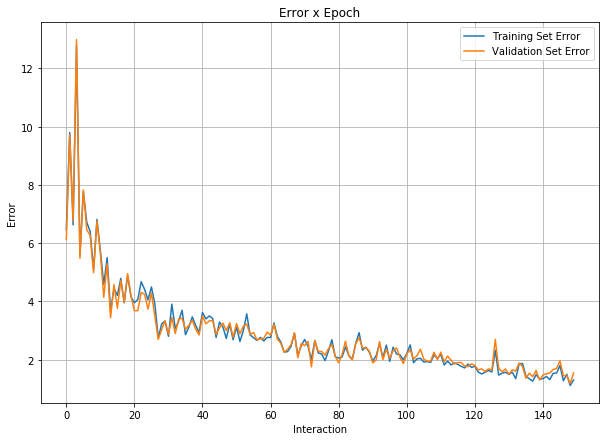

NETWORK STATE AFTER TRAINING:
 {'activation': 'sigmoid',
 'activation_last_layer': 'sigmoid',
 'architecture': [16,
                  8],
 'autoEncode': True,
 'encoder': OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False),
 'inputs': 2,
 'isClassification': True,
 'layers': [[{'activation': 'sigmoid', 'bias': 20.285914703704815, 'inputs': 2, 'newBias': 20.285914703704815, 'newWeights': array([ 3.58295585,  4.0375959 ]), 'weights': array([ 3.58295585,  4.0375959 ])},
             {'activation': 'sigmoid', 'bias': 1.0984122254357713, 'inputs': 2, 'newBias': 1.0984122254357713, 'newWeights': array([ 47.87656326,   5.1490797 ]), 'weights': array([ 47.87656326,   5.1490797 ])},
             {'activation': 'sigmoid', 'bias': 0.14268000531848563, 'inputs': 2, 'newBias': 0.14268000531848563, 'newWeights': array([ 33.29226064,   0.77860758]), 'weights': array([ 33.29226064,   0.77860758])},
             {'activa

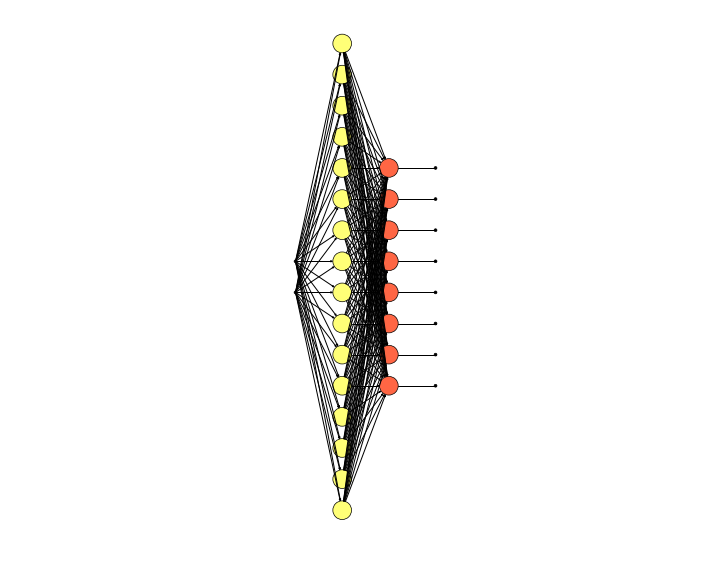

In [8]:
model = NeuralNetwork(2, [16, 8], isClassification=True, lr=0.15, autoEncode=True, activation='sigmoid',
                      activation_last_layer='sigmoid', seed=SEED)

print("TRAINING DETAILS:")
model.fit(X=X_train, y=y_train, epochs=150, verbose=False, plot=True)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))